# **Age pyramid forecast for the Moroccan population**

Hello,

My name is **Anas HAMOUTNI** and I am a **Moroccan Data Scientist**.

The goal of this project is to provide a reasonable **forecast** for the **age pyramid** of Morocco's population by **2050**.

An **age pyramid**, also known as an **age distribution or population pyramid**, is a graphical representation of a population's age structure at a specific point in time. It displays the **distribution of various age groups** (typically categorized in five-year intervals) along the horizontal axis, while the vertical axis represents the population size or **percentage** of the population in each age group.



In [73]:
#@title ##**Install necessary libraries** { display-mode: "form" }

!pip install xlrd
!pip install pmdarima

In [74]:
#@title ##**Import necessary libraries** { display-mode: "form" }

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pmdarima
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import requests
from google.colab import files

In [75]:
#@title ##**1. Import data** { display-mode: "form" }

#Donwload File
!wget --no-check-certificate 'https://docs.google.com/spreadsheets/d/1AsP_-NbbUTLppahysxYAoyHPqZb0ofRA/export?format=xlsx' -O population-by-age-and-gender-hcp-2014.xlsx

#Import Population Data
Global_Pop = pd.read_excel("/content/population-by-age-and-gender-hcp-2014.xlsx")
#Male Population by age band
Male_Pop = pd.read_excel('/content/population-by-age-and-gender-hcp-2014.xlsx', sheet_name="Male")
#Female Population by age band
Female_Pop = pd.read_excel('/content/population-by-age-and-gender-hcp-2014.xlsx', sheet_name="Female")

print("Summary of Male Data missing values : ")
print(Male_Pop)
print("\nSummary of Female Data missing values : ")
print(Female_Pop)

--2023-08-16 19:02:54--  https://docs.google.com/spreadsheets/d/1AsP_-NbbUTLppahysxYAoyHPqZb0ofRA/export?format=xlsx
Resolving docs.google.com (docs.google.com)... 173.194.193.102, 173.194.193.138, 173.194.193.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.193.102|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-0s-2g-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/cqqmeu3f5h8744tc5cmmnlhqjs/1692212570000/114858005334487865824/*/1AsP_-NbbUTLppahysxYAoyHPqZb0ofRA?format=xlsx [following]
--2023-08-16 19:02:54--  https://doc-0s-2g-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/cqqmeu3f5h8744tc5cmmnlhqjs/1692212570000/114858005334487865824/*/1AsP_-NbbUTLppahysxYAoyHPqZb0ofRA?format=xlsx
Resolving doc-0s-2g-sheets.googleusercontent.com (doc-0s-2g-sheets.googleusercontent.com)... 173.194.197.132, 2607:f8b0:4001:c1b::84
Connecting to doc-0s-2g-sheets.googleusercontent.com (doc-0s-2g-sheets.

**We have 16 age-band columns and one year column. First year is 1995 and last year is 2011.**

In [76]:
#@title ##**2. Check for Missing Values** { display-mode: "form" }

#Counting the proportion of missing values in Male Data
Male_missing = 100*(Male_Pop.isnull().sum())/len(Male_Pop)

#Counting the proportion of missing values in Female Data
Female_missing = 100*(Female_Pop.isnull().sum())/len(Female_Pop)

print("Summary of Male Data missing values : ")
print(Male_missing)
print("\nSummary of Female Data missing values : ")
print(Female_missing)

Summary of Male Data missing values : 
Year              0.0
Age band 0-4      0.0
Age band 5-9      0.0
Age band 10-14    0.0
Age band 15-19    0.0
Age band 20-24    0.0
Age band 25-29    0.0
Age band 30-34    0.0
Age band 35-39    0.0
Age band 40-44    0.0
Age band 45-49    0.0
Age band 50-54    0.0
Age band 55-59    0.0
Age band 60-64    0.0
Age band 65-69    0.0
Age band 70-74    0.0
Age band 75+      0.0
dtype: float64

Summary of Female Data missing values : 
Year              0.0
Age band 0-4      0.0
Age band 5-9      0.0
Age band 10-14    0.0
Age band 15-19    0.0
Age band 20-24    0.0
Age band 25-29    0.0
Age band 30-34    0.0
Age band 35-39    0.0
Age band 40-44    0.0
Age band 45-49    0.0
Age band 50-54    0.0
Age band 55-59    0.0
Age band 60-64    0.0
Age band 65-69    0.0
Age band 70-74    0.0
Age band 75+      0.0
dtype: float64


**We found no missing values.**

**Now, let's try to build a representation of the Moroccan population pyramid for the years 1995 and 2011.**

In [77]:
#@title ##**3. Age Pyramid of Training data** { display-mode: "form" }

#Count the number of age bands
age_band_len = len(Male_Pop.columns)-1

#Construct a vector containing age bands || Age bands are similar for Male and Female Data
age_band = [i for i in range(age_band_len)]
for i in range(age_band_len):
    age_band[i] = Male_Pop.columns[1:][i]

print(age_band)

['Age band 0-4', 'Age band 5-9', 'Age band 10-14', 'Age band 15-19', 'Age band 20-24', 'Age band 25-29', 'Age band 30-34', 'Age band 35-39', 'Age band 40-44', 'Age band 45-49', 'Age band 50-54', 'Age band 55-59', 'Age band 60-64', 'Age band 65-69', 'Age band 70-74', 'Age band 75+']


# **3.1. Year 1995**

99.99000000000001
100.0
               Age   Male  Female  Female_Left  Female_Width  Male_Left  \
0     Age band 0-4  12.01   11.48            0         11.48     -12.01   
1     Age band 5-9  12.56   11.98            0         11.98     -12.56   
2   Age band 10-14  12.43   12.04            0         12.04     -12.43   
3   Age band 15-19  11.00   11.01            0         11.01     -11.00   
4   Age band 20-24   9.77    9.93            0          9.93      -9.77   
5   Age band 25-29   7.75    8.27            0          8.27      -7.75   
6   Age band 30-34   7.06    7.76            0          7.76      -7.06   
7   Age band 35-39   6.29    6.13            0          6.13      -6.29   
8   Age band 40-44   5.27    4.97            0          4.97      -5.27   
9   Age band 45-49   3.35    3.37            0          3.37      -3.35   
10  Age band 50-54   2.84    3.38            0          3.38      -2.84   
11  Age band 55-59   2.51    2.59            0          2.59      -2.51   
1

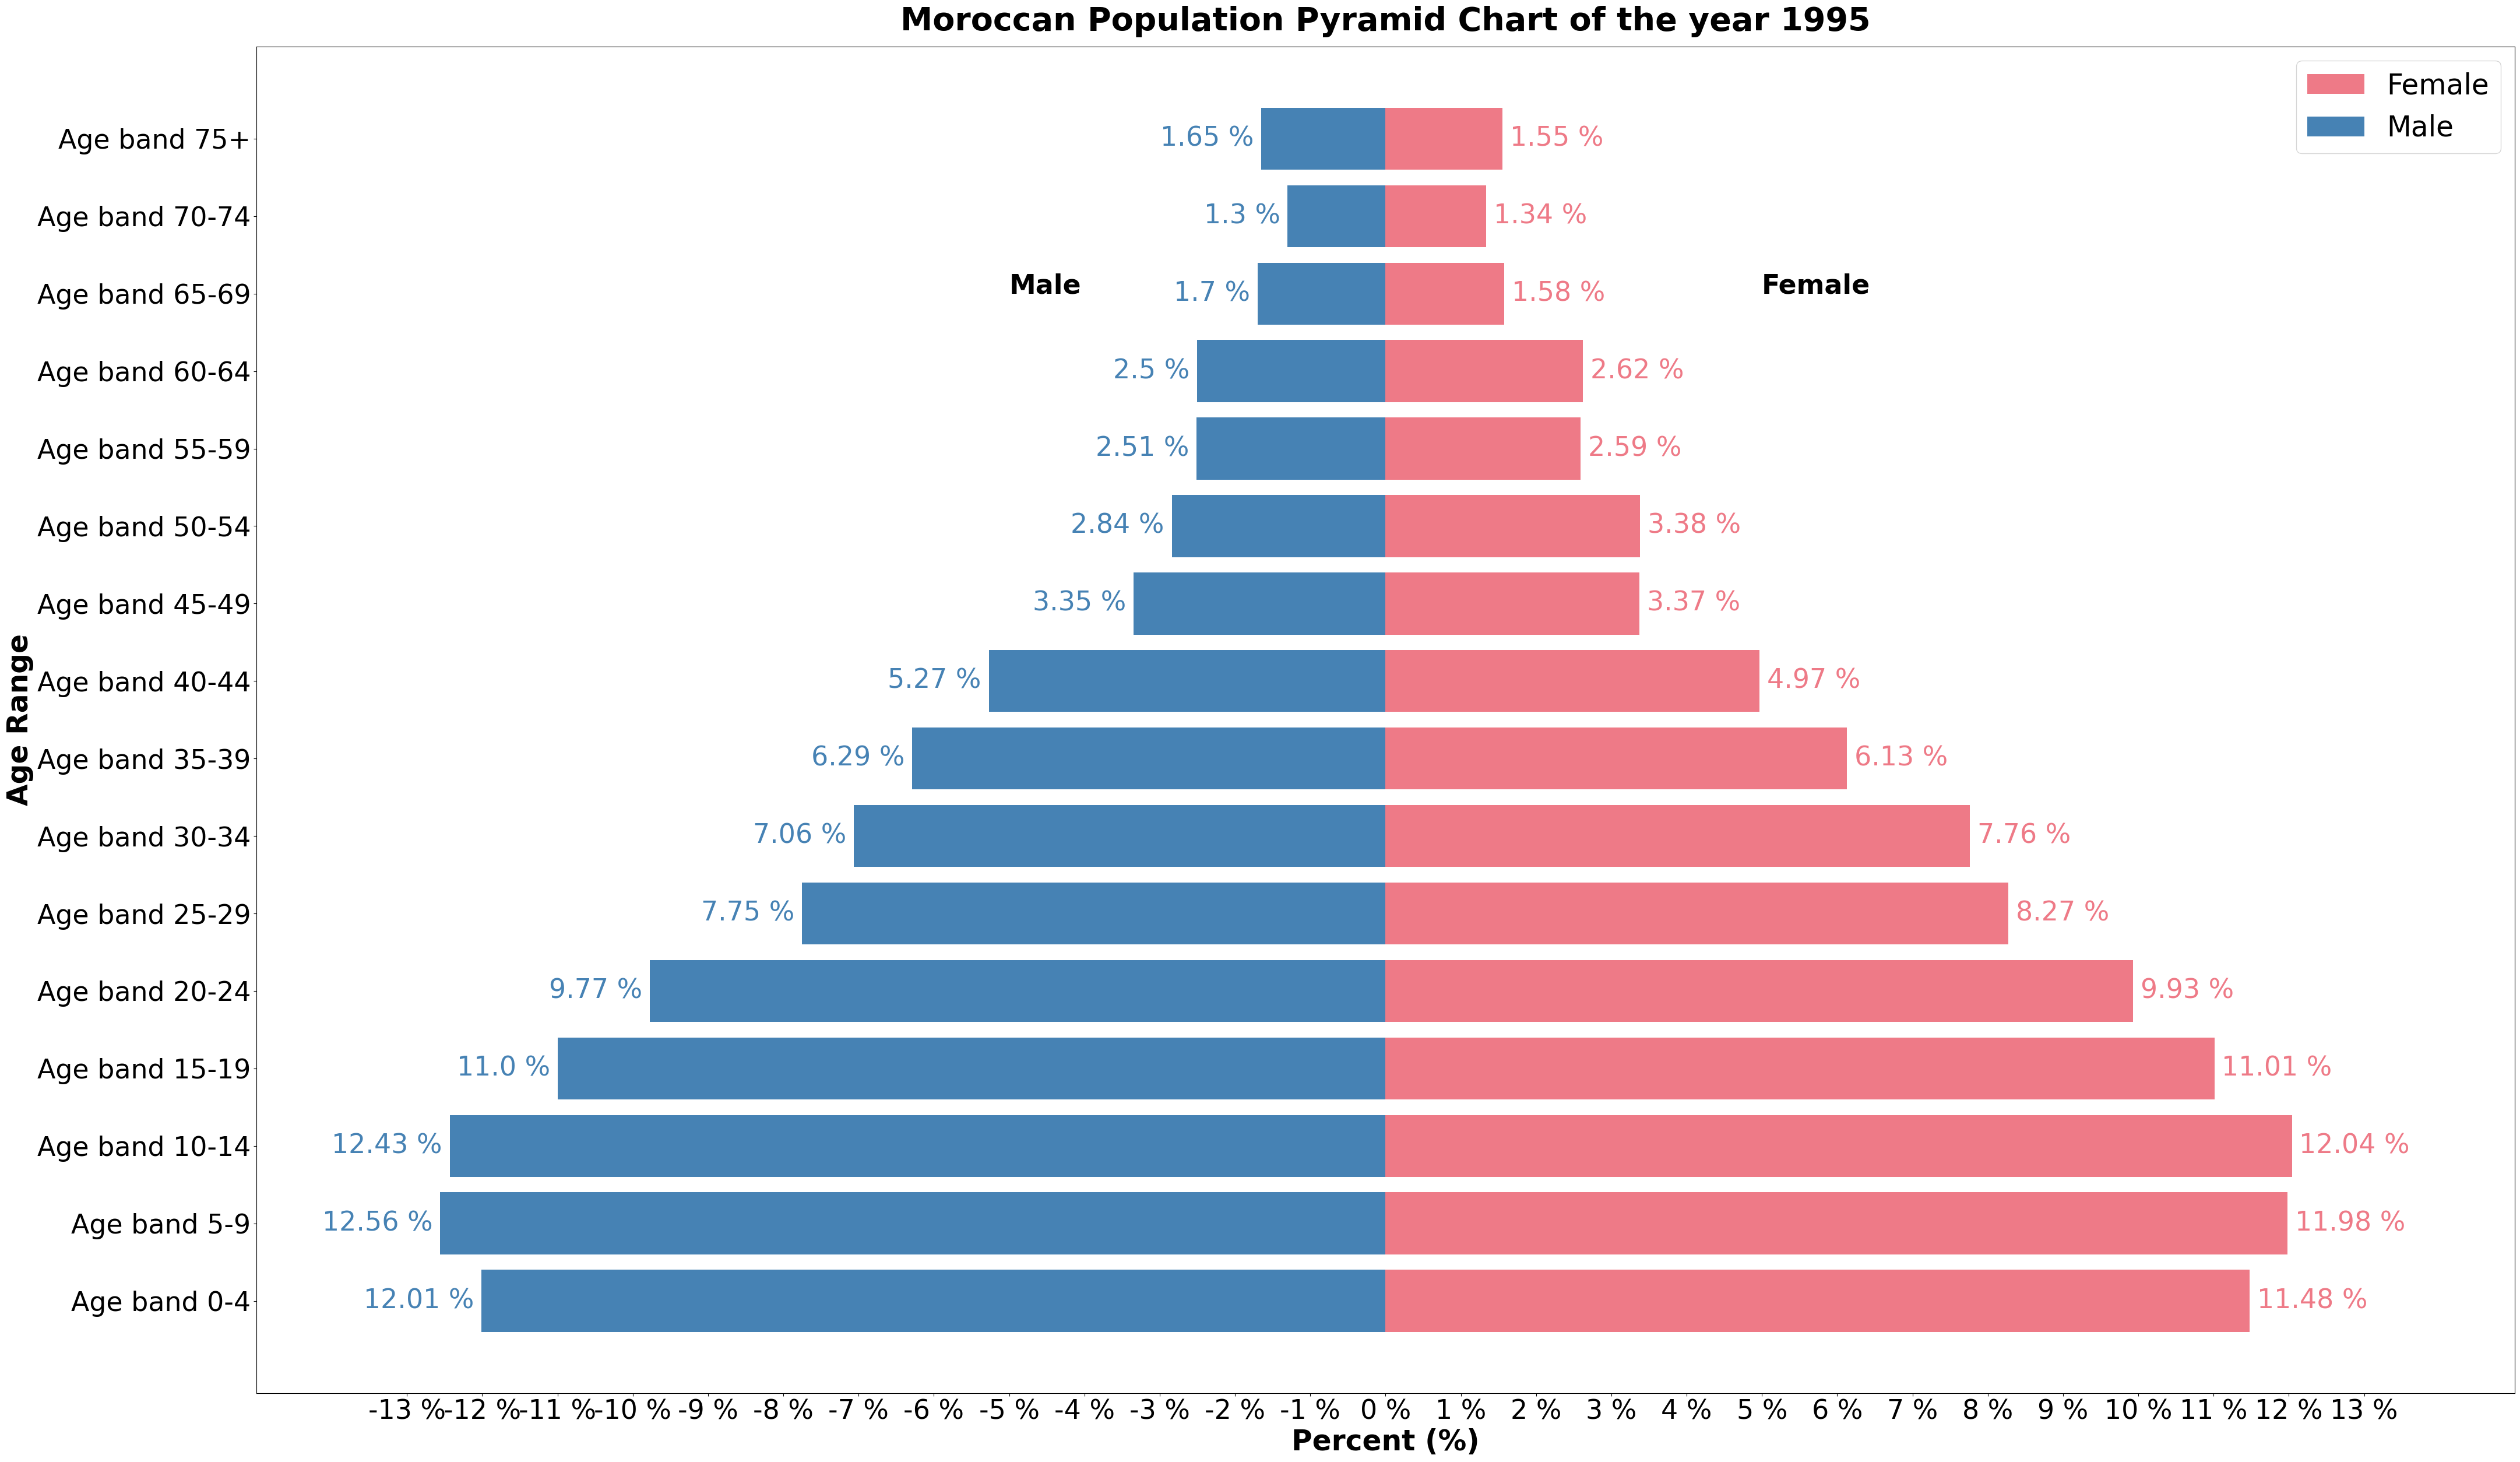

In [78]:
#======Preparing Data=======

#construct distribution vector for Male Population for 1995
male_1995 = [round((value / sum(Male_Pop.iloc[0][1:])) * 100,2) for value in Male_Pop.iloc[0][1:]]
print(sum(male_1995))

#construct distribution vector for Female Population for 1995
female_1995 = [round((value / sum(Female_Pop.iloc[0][1:])) * 100,2) for value in Female_Pop.iloc[0][1:]]
print(sum(female_1995))

#join age_band with male and female distribution for the year 1995
population_1995 = pd.DataFrame({"Age": age_band, "Male": male_1995, "Female": female_1995})

#Manipulating Data for Pyramid construction
population_1995["Female_Left"] = 0
population_1995["Female_Width"] = population_1995["Female"]

population_1995["Male_Left"] = -population_1995["Male"]
population_1995["Male_Width"] = population_1995["Male"]

#for more info please visit: https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib

print(population_1995)

#======Plot=======

#set plot colors
female_color = "#ee7a87"
male_color = "#4682b4"

#set the figure size
fig_1995 = plt.figure(figsize=(50,30))


#create horizontal bar charts for the male and female population data
plt.barh(y=population_1995["Age"], width=population_1995["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=population_1995["Age"], width=population_1995["Male_Width"], left=population_1995["Male_Left"],
         color="#4682b4", label="Male");

#Add the labels "Male" and "Female" to the chart
plt.text(-5, 13, "Male", fontsize=33, fontweight="bold");
plt.text(5, 13, "Female", fontsize=33, fontweight="bold");

#A for loop is used to add percentage labels for each age group to the chart
for idx in range(len(population_1995)):
    plt.text(x=population_1995["Male_Left"][idx]-0.1, y=idx, s="{} %".format(population_1995["Male"][idx]),
             ha="right", va="center",
             fontsize=33, color="#4682b4");
    plt.text(x=population_1995["Female_Width"][idx]+0.1, y=idx, s="{} %".format(population_1995["Female"][idx]),
             ha="left", va="center",
             fontsize=33, color="#ee7a87");

#used to set the limits of the x-axis
plt.xlim(-15,15);

#specify the tick labels for the x-axis
plt.xticks(range(-13,14), ["{} %".format(i) for i in range(-13,14)]);

plt.xticks(fontsize=33)
plt.yticks(fontsize=33)

plt.legend(loc="best",fontsize=35);

#Add label and title
plt.xlabel("Percent (%)", fontsize=35, fontweight="bold")
plt.ylabel("Age Range", fontsize=35, fontweight="bold")
plt.title("Moroccan Population Pyramid Chart of the year 1995", loc="center", pad=20, fontsize=40, fontweight="bold");

**It is evident that in 1995, Morocco's population pyramid exhibited a robust structure, characterized by a substantial young population and a strong workforce.**

# **3.2. Year 2011**

99.98
100.00000000000001


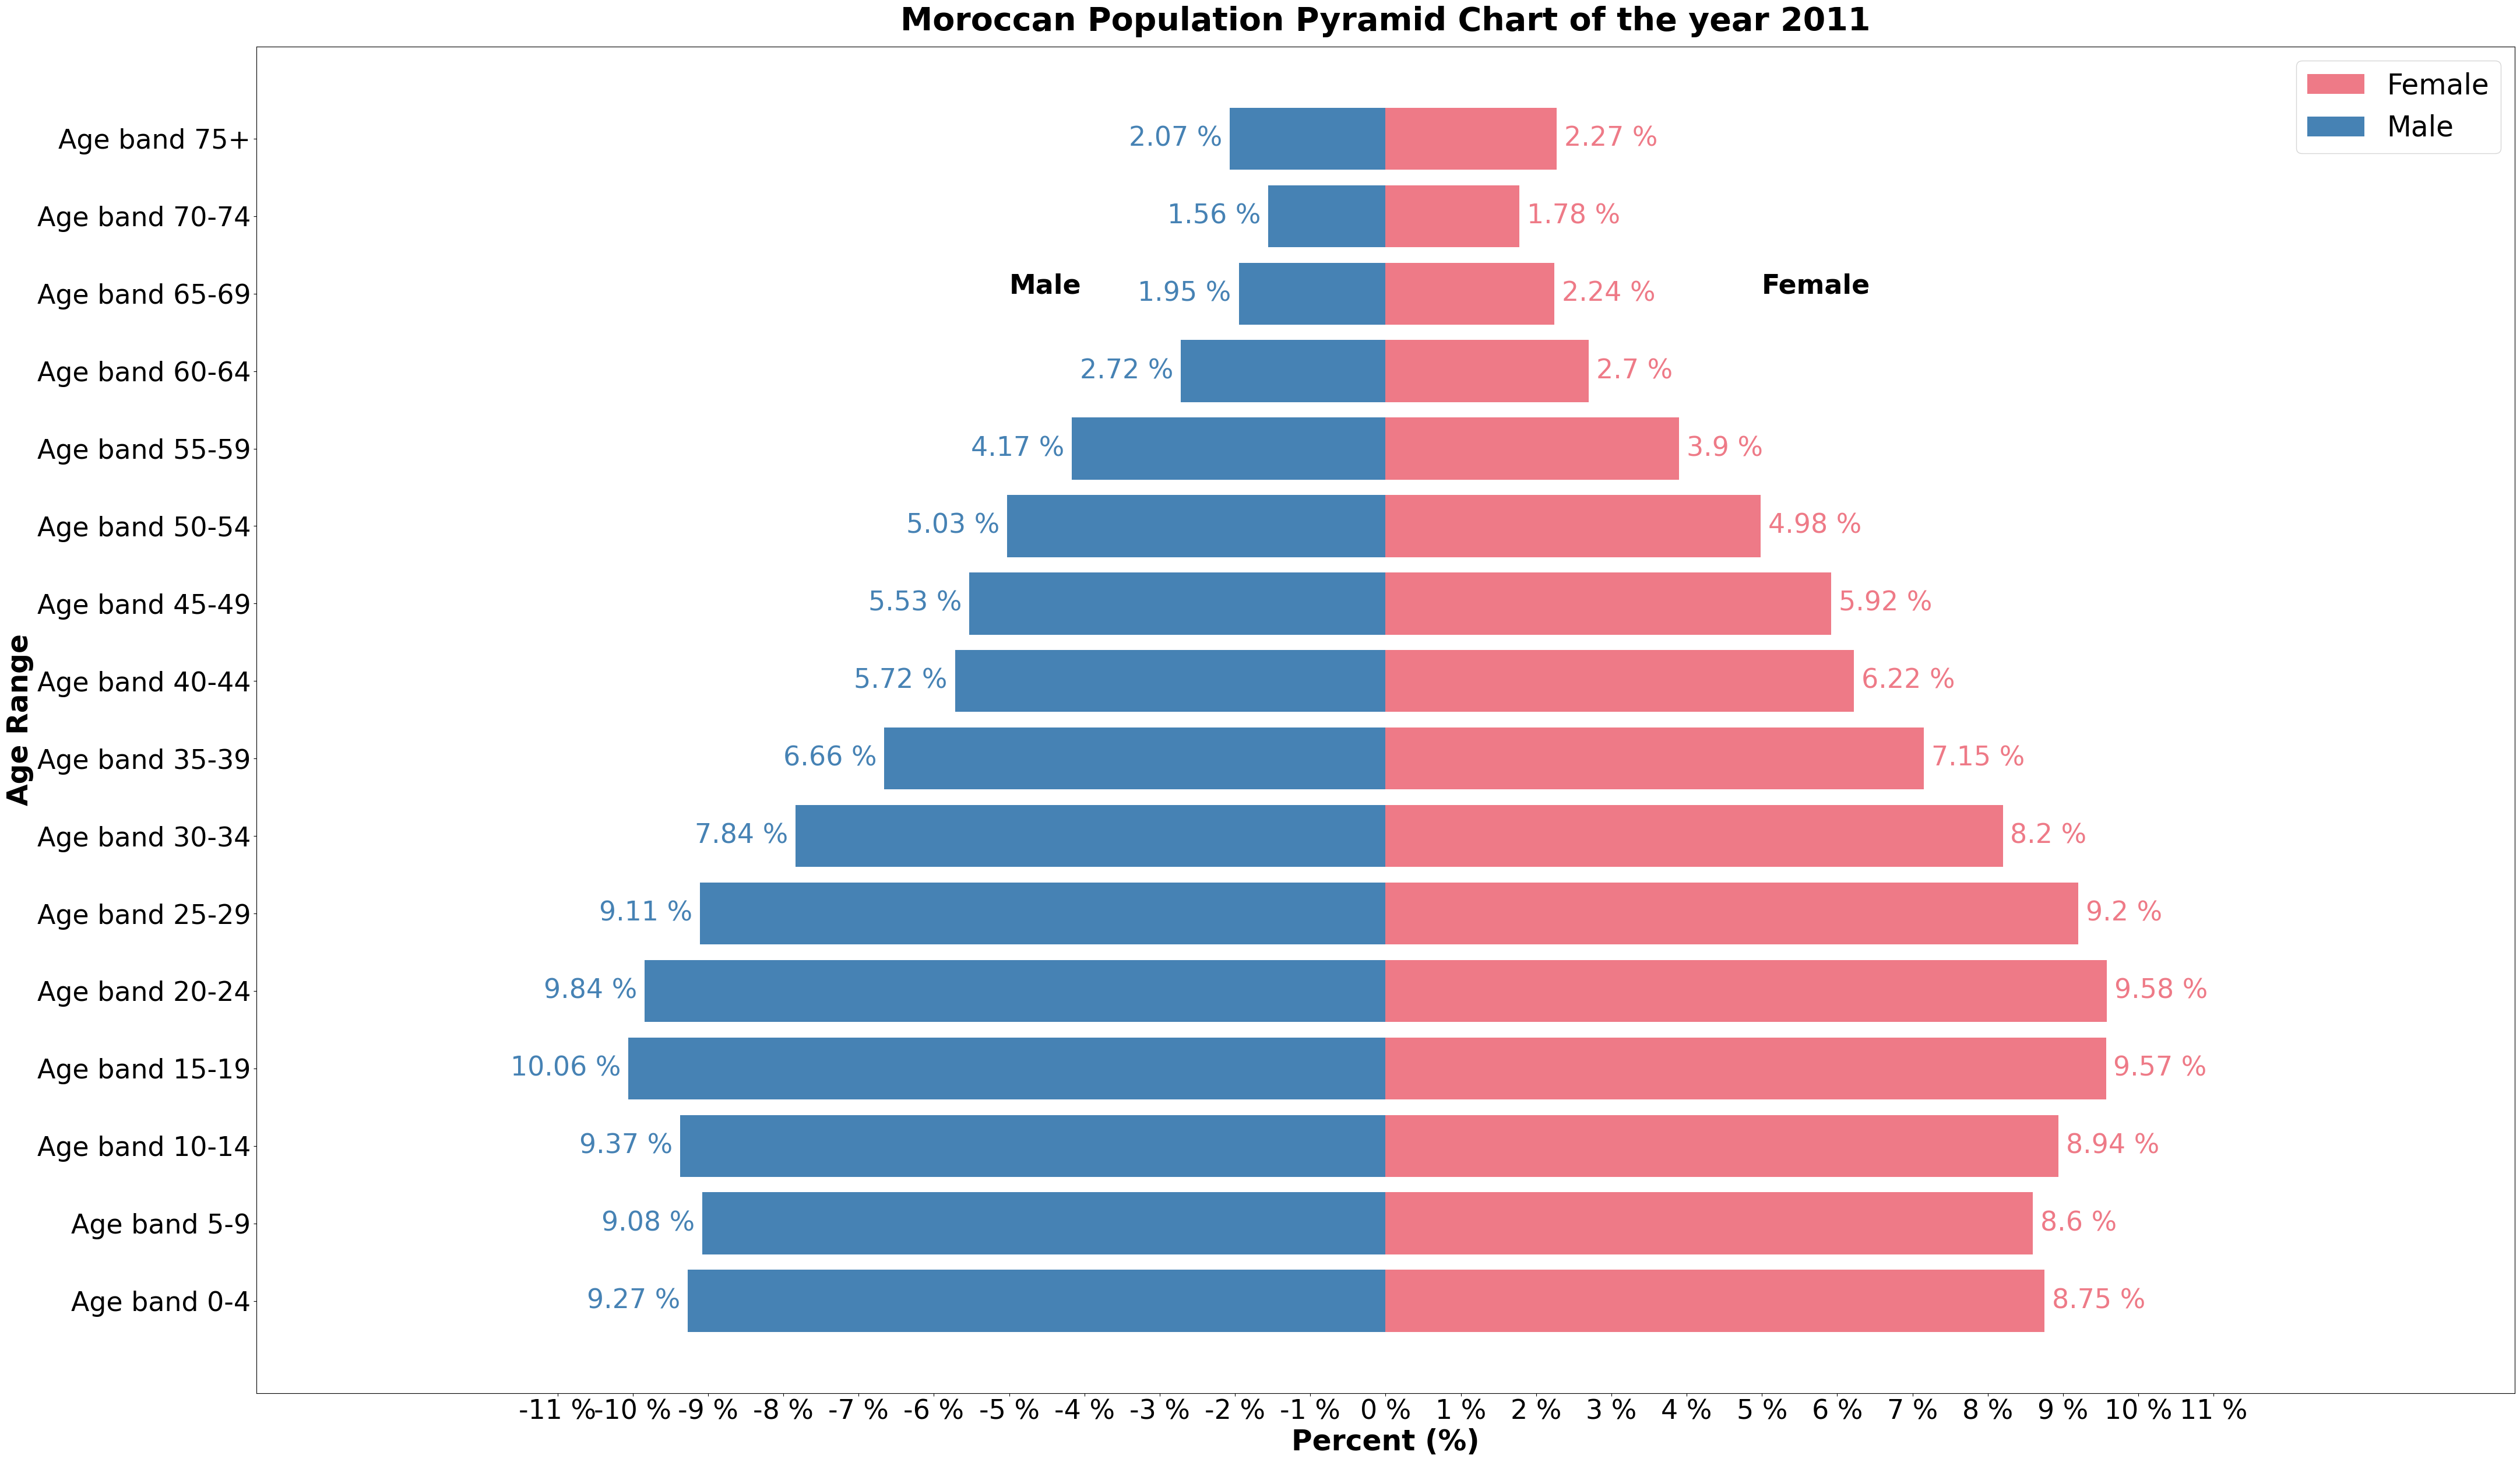

In [79]:
#======Preparing Data=======


#construct distribution vector for Male Population for 2011
male_2011 = [round((value / sum(Male_Pop.iloc[-1][1:])) * 100,2) for value in Male_Pop.iloc[-1][1:]]
print(sum(male_2011))

#construct distribution vector for Female Population for 2011
female_2011 = [round((value / sum(Female_Pop.iloc[-1][1:])) * 100,2) for value in Female_Pop.iloc[-1][1:]]
print(sum(female_2011))

#join age_band with male and female distribution for the year 2011
population_2011 = pd.DataFrame({"Age": age_band, "Male": male_2011, "Female": female_2011})

#Manipulating Data for Pyramid construction
population_2011["Female_Left"] = 0
population_2011["Female_Width"] = population_2011["Female"]

population_2011["Male_Left"] = -population_2011["Male"]
population_2011["Male_Width"] = population_2011["Male"]

#for more info please visit: https://coderzcolumn.com/tutorials/data-science/population-pyramid-chart-using-matplotlib

population_2011


#======Plot=======

#set plot colors
female_color = "#ee7a87"
male_color = "#4682b4"

#set the figure size
fig_2011 = plt.figure(figsize=(50,30))

#create horizontal bar charts for the male and female population data
plt.barh(y=population_2011["Age"], width=population_2011["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=population_2011["Age"], width=population_2011["Male_Width"], left=population_2011["Male_Left"],
         color="#4682b4", label="Male");

#Add the labels "Male" and "Female" to the chart
plt.text(-5, 13, "Male", fontsize=33, fontweight="bold");
plt.text(5, 13, "Female", fontsize=33, fontweight="bold");

#A for loop is used to add percentage labels for each age group to the chart
for idx in range(len(population_2011)):
    plt.text(x=population_2011["Male_Left"][idx]-0.1, y=idx, s="{} %".format(population_2011["Male"][idx]),
             ha="right", va="center",
             fontsize=33, color="#4682b4");
    plt.text(x=population_2011["Female_Width"][idx]+0.1, y=idx, s="{} %".format(population_2011["Female"][idx]),
             ha="left", va="center",
             fontsize=33, color="#ee7a87");

#used to set the limits of the x-axis
plt.xlim(-15,15);

#specify the tick labels for the x-axis
plt.xticks(range(-11,12), ["{} %".format(i) for i in range(-11,12)]);

plt.xticks(fontsize=33)
plt.yticks(fontsize=33)

plt.legend(loc="best",fontsize=35);

#Add label and title
plt.xlabel("Percent (%)", fontsize=35, fontweight="bold")
plt.ylabel("Age Range", fontsize=35, fontweight="bold")
plt.title("Moroccan Population Pyramid Chart of the year 2011", loc="center", pad=20, fontsize=40, fontweight="bold");


**In 2011, we observed that the young population was smaller than in 1995, and the workforce was also reduced. This decline can be attributed to a decrease in the birth rate, which has consequently raised significant concerns within the Moroccan pension industry.**

# **4. ARIMA forecasting**

We are going to apply one of the most commonly used method for time-series forecasting, known as **ARIMA**, which stands for **Autoregressive Integrated Moving Average**.

**ARIMA** models are denoted with the notation **ARIMA(p, d, q)**. These three parameters account for seasonality, trend, and noise in data.

The **ARIMA(p, d, q)** model can be written as:

$$
(1 - \phi_1 B - \phi_2 B^2 - \ldots - \phi_p B^p)(1 - B)^d X_t = (1 + \theta_1 B + \theta_2 B^2 + \ldots + \theta_q B^q) \varepsilon_t,
$$

where:
- $ (1 - B)^d X_t $ represents the differencing component of the model, where $ B $ is the backshift operator, and $ d $ is the degree of differencing.
- The left-hand side contains the autoregressive (AR) part of the model with the coefficients $ \phi_1, \phi_2, \ldots, \phi_p $, where $ p $ is the order of the AR component.
- The right-hand side contains the moving average (MA) part of the model with the coefficients $ \theta_1, \theta_2, \ldots, \theta_q $, where $ q $ is the order of the MA component.
- $ \varepsilon_t $ is a white noise error term.

In [80]:
#@title ##**4.1. Male Population Forecast** { display-mode: "form" }

#====Prepare training data======

#Make a copy of the Male population original data which is the Male training data
Male_Pop_train = Male_Pop.copy()

#convert year column from integer to Date type
Male_Pop_train["Year"]=pd.to_datetime(Male_Pop_train["Year"].astype(str) + '-01-01')

#set the index of the Male training data as the year column
Male_Pop_train.set_index('Year', inplace=True)


#=========Forecasting==========

#create an empty Data Frame that will store the forecasted data
forecasted_data = pd.DataFrame()

# Loop through each age band's population count
for column in Male_Pop_train.columns:
    age_band_data_male = Male_Pop_train[column]

    # Determine order of differencing using ADF test or KPSS test
    # Apply differencing if needed

    # Use auto_arima to automatically select optimal ARIMA orders
    model = auto_arima(age_band_data_male, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=None,
                      trace=False,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

    # Fit the ARIMA model
    model.fit(age_band_data_male)
    # Save Best ARIMA model
    best_model = model.fit(age_band_data_male)

    # Getting the optimal ARIMA orders
    optimal_order = best_model.get_params()['order']
    print(f"Optimal ARIMA Order: {optimal_order}")

    # Forecast next years (e.g., until 2050)
    forecast_periods = int(2050 - Male_Pop_train.index[-1].year)
    forecast, conf_int = model.predict(n_periods=forecast_periods, return_conf_int=True)
    forecast_index = pd.date_range(start=Male_Pop_train.index[-1] + pd.DateOffset(years=1), periods=forecast_periods, freq='Y')
    print(forecast)
    forecast_df = pd.DataFrame(forecast)
    print(forecast_df)
    # Concatenate the forecasted values to the original data
    forecasted_data = pd.concat([forecasted_data, forecast_df], axis=1)

forecasted_data

Optimal ARIMA Order: (2, 1, 2)
2012-01-01    1.481538e+06
2013-01-01    1.478729e+06
2014-01-01    1.477057e+06
2015-01-01    1.477098e+06
2016-01-01    1.478440e+06
2017-01-01    1.480114e+06
2018-01-01    1.481206e+06
2019-01-01    1.481305e+06
2020-01-01    1.480587e+06
2021-01-01    1.479598e+06
2022-01-01    1.478896e+06
2023-01-01    1.478765e+06
2024-01-01    1.479141e+06
2025-01-01    1.479719e+06
2026-01-01    1.480164e+06
2027-01-01    1.480284e+06
2028-01-01    1.480094e+06
2029-01-01    1.479759e+06
2030-01-01    1.479480e+06
2031-01-01    1.479384e+06
2032-01-01    1.479477e+06
2033-01-01    1.479669e+06
2034-01-01    1.479842e+06
2035-01-01    1.479913e+06
2036-01-01    1.479870e+06
2037-01-01    1.479761e+06
2038-01-01    1.479655e+06
2039-01-01    1.479605e+06
2040-01-01    1.479622e+06
2041-01-01    1.479684e+06
2042-01-01    1.479748e+06
2043-01-01    1.479782e+06
2044-01-01    1.479777e+06
2045-01-01    1.479743e+06
2046-01-01    1.479704e+06
2047-01-01    1.479681e+

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-01-01,1.481538e+06,1441812.5,1491750.0,1.610182e+06,1594375.0,1486625.0,1275500.0,1082062.5,930000.0,892492.954779,833062.5,689125.0,442750.0,306008.213366,254937.5,339250.0
2013-01-01,1.478729e+06,1429625.0,1483500.0,1.609584e+06,1612750.0,1514250.0,1296000.0,1097125.0,944000.0,898754.901988,860125.0,710250.0,449500.0,302107.530906,259875.0,346500.0
2014-01-01,1.477057e+06,1417437.5,1475250.0,1.609147e+06,1631125.0,1541875.0,1316500.0,1112187.5,958000.0,904259.633393,887187.5,731375.0,456250.0,296607.493595,264812.5,353750.0
2015-01-01,1.477098e+06,1405250.0,1467000.0,1.608827e+06,1649500.0,1569500.0,1337000.0,1127250.0,972000.0,909098.714087,914250.0,752500.0,463000.0,296040.970634,269750.0,361000.0
2016-01-01,1.478440e+06,1393062.5,1458750.0,1.608594e+06,1667875.0,1597125.0,1357500.0,1142312.5,986000.0,913352.636801,941312.5,773625.0,469750.0,295299.944039,274687.5,368250.0
2017-01-01,1.480114e+06,1380875.0,1450500.0,1.608423e+06,1686250.0,1624750.0,1378000.0,1157375.0,1000000.0,917092.160815,968375.0,794750.0,476500.0,299075.234415,279625.0,375500.0
2018-01-01,1.481206e+06,1368687.5,1442250.0,1.608298e+06,1704625.0,1652375.0,1398500.0,1172437.5,1014000.0,920379.488957,995437.5,815875.0,483250.0,301054.350035,284562.5,382750.0
2019-01-01,1.481305e+06,1356500.0,1434000.0,1.608207e+06,1723000.0,1680000.0,1419000.0,1187500.0,1028000.0,923269.302279,1022500.0,837000.0,490000.0,305233.020252,289500.0,390000.0
2020-01-01,1.480587e+06,1344312.5,1425750.0,1.608140e+06,1741375.0,1707625.0,1439500.0,1202562.5,1042000.0,925809.669614,1049562.5,858125.0,496750.0,305649.788564,294437.5,397250.0
2021-01-01,1.479598e+06,1332125.0,1417500.0,1.608091e+06,1759750.0,1735250.0,1460000.0,1217625.0,1056000.0,928042.847153,1076625.0,879250.0,503500.0,307019.253122,299375.0,404500.0


**Combine Male training data with projections:**

In [81]:
forecasted_data.columns = Male_Pop_train.columns

#Combine Male training data with Male Forecasted data
Combined_Male_Pop = pd.concat([Male_Pop_train, forecasted_data], axis=0)

In [82]:
#@title ##**4.2. Female Population Forecast** { display-mode: "form" }

#====Prepare training data======

#Make a copy of the Female population original data which is also the Female training data
Female_Pop_train = Female_Pop.copy()

#convert year column from integer to Date type
Female_Pop_train["Year"]=pd.to_datetime(Female_Pop_train["Year"].astype(str) + '-01-01')

#set the index of the Female training data as the year column
Female_Pop_train.set_index('Year', inplace=True)


#=========Forecasting==========

#create an empty Data Frame that will store the forecasted data
forecasted_data = pd.DataFrame()

# Loop through each age band's population count
for column in Female_Pop_train.columns:
    age_band_data_female = Female_Pop_train[column]

    # Determine order of differencing using ADF test or KPSS test
    # Apply differencing if needed

    # Use auto_arima to automatically select optimal ARIMA orders
    model = auto_arima(age_band_data_female, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

    # Fit the ARIMA model
    model.fit(age_band_data_female)

    # Forecast next years (e.g., until 2050)
    forecast_periods = int(2050 - Female_Pop_train.index[-1].year)
    forecast, conf_int = model.predict(n_periods=forecast_periods, return_conf_int=True)
    forecast_index = pd.date_range(start=Female_Pop_train.index[-1] + pd.DateOffset(years=1), periods=forecast_periods, freq='Y')
    forecast_df = pd.DataFrame(forecast)
    # Concatenate the forecasted values to the original data
    forecasted_data = pd.concat([forecasted_data, forecast_df], axis=1)

forecasted_data

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=343.952, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=347.462, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=352.645, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=347.148, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=349.979, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=345.284, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=345.783, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=345.147, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=346.613, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=339.871, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=350.516, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=346.166, Time=0.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.3

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-01-01,1.414142e+06,1384000.0,1441937.5,1553000.0,1570937.5,1517812.5,1349875.0,1.165456e+06,1030875.0,993125.0,830500.0,651125.0,439000.0,362882.304510,295937.5,379250.0
2013-01-01,1.401563e+06,1372000.0,1432875.0,1553000.0,1585875.0,1542625.0,1368750.0,1.168947e+06,1052750.0,1025250.0,853000.0,669250.0,439000.0,362204.824973,302875.0,389500.0
2014-01-01,1.385834e+06,1360000.0,1423812.5,1553000.0,1600812.5,1567437.5,1387625.0,1.171682e+06,1074625.0,1057375.0,875500.0,687375.0,439000.0,361794.177775,309812.5,399750.0
2015-01-01,1.370728e+06,1348000.0,1414750.0,1553000.0,1615750.0,1592250.0,1406500.0,1.173825e+06,1096500.0,1089500.0,898000.0,705500.0,439000.0,361545.268231,316750.0,410000.0
2016-01-01,1.359484e+06,1336000.0,1405687.5,1553000.0,1630687.5,1617062.5,1425375.0,1.175504e+06,1118375.0,1121625.0,920500.0,723625.0,439000.0,361394.394292,323687.5,420250.0
2017-01-01,1.353422e+06,1324000.0,1396625.0,1553000.0,1645625.0,1641875.0,1444250.0,1.176819e+06,1140250.0,1153750.0,943000.0,741750.0,439000.0,361302.943617,330625.0,430500.0
2018-01-01,1.351497e+06,1312000.0,1387562.5,1553000.0,1660562.5,1666687.5,1463125.0,1.177850e+06,1162125.0,1185875.0,965500.0,759875.0,439000.0,361247.511738,337562.5,440750.0
2019-01-01,1.350923e+06,1300000.0,1378500.0,1553000.0,1675500.0,1691500.0,1482000.0,1.178657e+06,1184000.0,1218000.0,988000.0,778000.0,439000.0,361213.912280,344500.0,451000.0
2020-01-01,1.348513e+06,1288000.0,1369437.5,1553000.0,1690437.5,1716312.5,1500875.0,1.179290e+06,1205875.0,1250125.0,1010500.0,796125.0,439000.0,361193.546316,351437.5,461250.0
2021-01-01,1.342109e+06,1276000.0,1360375.0,1553000.0,1705375.0,1741125.0,1519750.0,1.179786e+06,1227750.0,1282250.0,1033000.0,814250.0,439000.0,361181.201698,358375.0,471500.0


**Combine Female training data with projections:**

In [83]:
forecasted_data.columns = Female_Pop_train.columns

#Combine Female training data with Female Forecasted data
Combined_Female_Pop = pd.concat([Female_Pop_train, forecasted_data], axis=0)

99.97999999999999
99.97999999999999


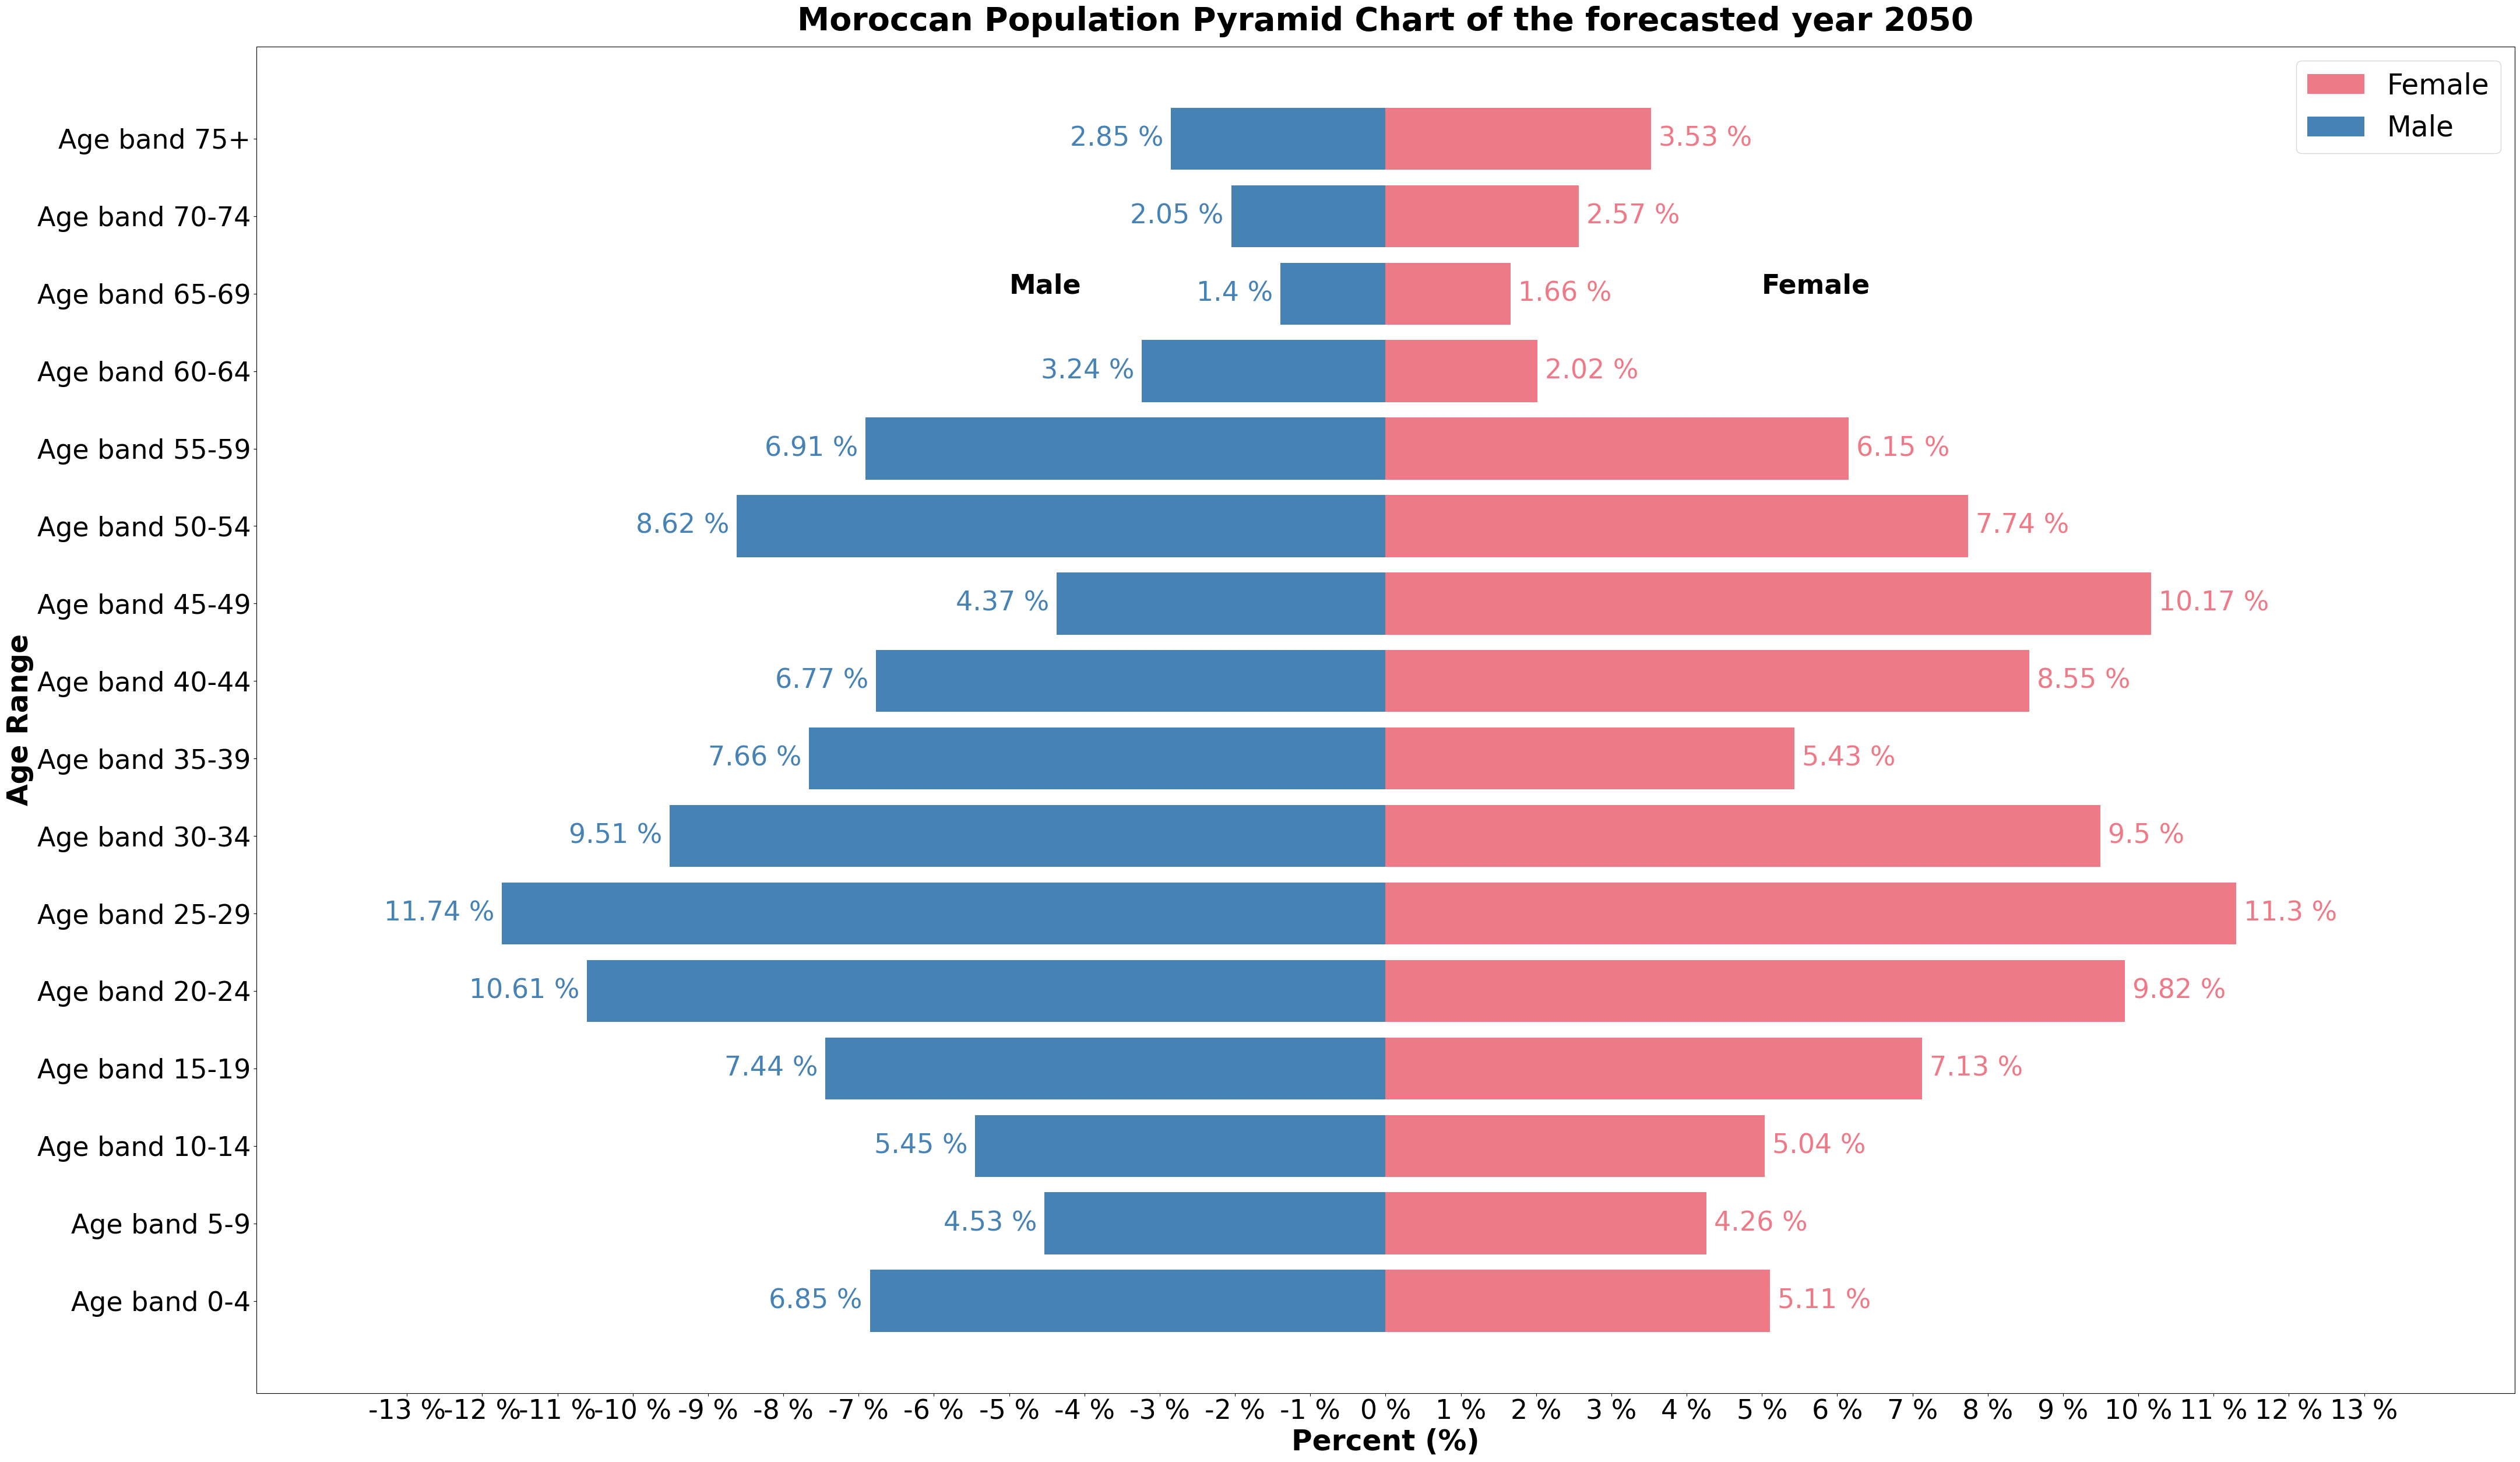

In [84]:
#@title ##**5. Population Pyramid of the Forecasted year 2050** { display-mode: "form" }

#========Structuring data=========

#Construct Male distribution vector of the year 2050
male_2050 = [round((value / sum(Combined_Male_Pop.iloc[-1])) * 100,2) for value in Combined_Male_Pop.iloc[-1]]

#Construct Female distribution vector of the year 2050
female_2050 = [round((value / sum(Combined_Female_Pop.iloc[-1])) * 100,2) for value in Combined_Female_Pop.iloc[-1]]

#Verify that the sum of eac vector is 100%
print(sum(female_2050))
print(sum(female_2050))

#Manipulating Data for Pyramid construction
population_2050 = pd.DataFrame({"Age": age_band, "Male": male_2050, "Female": female_2050})

population_2050["Female_Left"] = 0
population_2050["Female_Width"] = population_2050["Female"]

population_2050["Male_Left"] = -population_2050["Male"]
population_2050["Male_Width"] = population_2050["Male"]


#=======Plot=========

#set plot colors
female_color = "#ee7a87"
male_color = "#4682b4"

#set figure size
fig_2050 = plt.figure(figsize=(50,30))

#create horizontal bar charts for the male and female population data
plt.barh(y=population_2050["Age"], width=population_2050["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=population_2050["Age"], width=population_2050["Male_Width"], left=population_2050["Male_Left"],
         color="#4682b4", label="Male");

#Add the labels "Male" and "Female" to the chart
plt.text(-5, 13, "Male", fontsize=33, fontweight="bold");
plt.text(5, 13, "Female", fontsize=33, fontweight="bold");

#for loop is then used to add percentage labels for each age group to the chart
for idx in range(len(population_2050)):
    plt.text(x=population_2050["Male_Left"][idx]-0.1, y=idx, s="{} %".format(population_2050["Male"][idx]),
             ha="right", va="center",
             fontsize=33, color="#4682b4");
    plt.text(x=population_2050["Female_Width"][idx]+0.1, y=idx, s="{} %".format(population_2050["Female"][idx]),
             ha="left", va="center",
             fontsize=33, color="#ee7a87");

#set the limits of the x-axis
plt.xlim(-15,15);

#specify the tick labels for the x-axis
plt.xticks(range(-13,14), ["{} %".format(i) for i in range(-13,14)]);

plt.xticks(fontsize=33)
plt.yticks(fontsize=33)

plt.legend(loc="best",fontsize=35);

#add labels and a title to the chart
plt.xlabel("Percent (%)", fontsize=35, fontweight="bold")
plt.ylabel("Age Range", fontsize=35, fontweight="bold")
plt.title("Moroccan Population Pyramid Chart of the forecasted year 2050", loc="center", pad=20, fontsize=40, fontweight="bold");


**By the year 2050, if no solution is presented to address the issue of declining young population, it is likely that we will observe a rapid aging of the Moroccan population. The government might be compelled to import a significant number of young immigrants, particularly from sub-Saharan Africa. This would be necessary to offset the pronounced demand for a workforce and to ensure the sustainability of the pension system.**